In [32]:
import numpy as np
from implementations import *
from proj1_helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [15]:
'''Load the data both from train and test csv file'''

y, x, ids = load_csv_data("train.csv", sub_sample=False)
_, x_submission, ids_submission = load_csv_data("test.csv", sub_sample=False)
x[x==-999] = 0
x = standardize_by_column(x)
x_submission[x_submission==-999] = 0
x_submission = standardize_by_column(x_submission)

Correct answers:  76.4 % for lambda = 1000000.000000


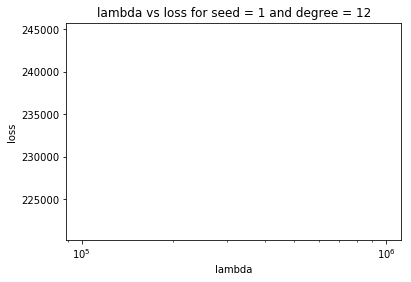

In [29]:
'''Define values to perform Ridge regression with simple splitting of the dataset'''

degree = 12
ratio = 0.9  #train/test examples
lambdas = [1e6]
seed = 1

w = ridge_with_simple_splitting(y,x, degree, ratio, lambdas, seed)

Correct answers:  80.1168 % for lambda = 1.000000
Correct answers:  77.96 % for lambda = 46.415888
Correct answers:  82.56 % for lambda = 2154.434690
Correct answers:  82.6976 % for lambda = 100000.000000
Correct answers:  82.7568 % for lambda = 4641588.833613
Correct answers:  82.6816 % for lambda = 215443469.003189
Correct answers:  80.5136 % for lambda = 10000000000.000000
Correct answers:  75.7472 % for lambda = 464158883361.279175
Correct answers:  71.8992 % for lambda = 21544346900318.867188
Correct answers:  70.792 % for lambda = 1000000000000000.000000
Correct answers:  79.1248 % for lambda = 1.000000
Correct answers:  81.5856 % for lambda = 46.415888
Correct answers:  81.496 % for lambda = 2154.434690
Correct answers:  81.6064 % for lambda = 100000.000000
Correct answers:  81.792 % for lambda = 4641588.833613
Correct answers:  82.5984 % for lambda = 215443469.003189
Correct answers:  80.9984 % for lambda = 10000000000.000000
Correct answers:  75.8016 % for lambda = 46415888336

array([  1.15619639e-05,  -2.66435536e-05,   4.61399947e-06,
        -8.25669878e-05,  -3.66873722e-05,  -2.13981903e-04,
         5.96896236e-05,   9.86692653e-07,  -1.89129348e-06,
         2.43397010e-07,  -1.25904980e-08,   2.38821953e-10,
        -1.98722852e-05,  -1.09894137e-05,  -2.99461852e-05,
        -2.61442490e-05,  -5.59482085e-05,  -2.94259082e-05,
        -1.22707585e-05,   9.63714479e-06,  -1.84431676e-06,
         1.58063804e-07,  -6.42098840e-09,   1.00753448e-10,
         2.25977605e-06,  -2.08473073e-05,  -2.25349075e-05,
        -6.41645787e-05,  -7.34470483e-05,  -3.83958611e-05,
         1.83535302e-05,  -2.72807410e-06,   1.99256257e-07,
        -7.81517953e-09,   1.58012219e-10,  -1.29447618e-12,
         1.08110545e-05,   1.75826570e-06,   2.22947738e-05,
         4.16044061e-05,   1.02096383e-04,   1.42176272e-04,
        -3.31094338e-05,   1.75906961e-06,   1.57604114e-08,
        -6.32646075e-10,  -4.36496706e-11,   6.72941832e-13,
         6.14054950e-06,

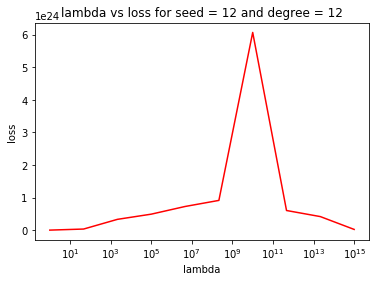

In [13]:
'''Define values to perform Ridge regression with cross validation of the dataset'''

k_fold = 4 #define the number of folds
degree = 12 #define the degree
lambdas = np.logspace(0,15,10) #define the lambdas
seed = 12 #seed for the random splitting

w = cross_validation_ridge(y, x, k_fold, degree, lambdas, seed)

In [38]:
'''Define values to perform logistic regression with cross validation of the dataset'''

k_fold = 4 #define the number of folds
degree = 12 #define the degree
gammas = np.logspace(-5,1,10) #define the lambdas
seed = 1 #seed for the random splitting
initial_w = np.zeros((796,))
max_iters = 100

cross_validation_logistic(y, x, initial_w, k_fold, degree, max_iters, gammas, seed)

C:\Users\leope\Desktop\project_1_final\implementations.py:231: RuntimeWarning: overflow encountered in exp
  return sum(np.log(1+np.exp(np.dot(tx,w))) - y*np.dot(tx,w))
C:\Users\leope\Desktop\project_1_final\implementations.py:227: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t) ) #np.exp(t)/(1+np.exp(t))
C:\Users\leope\Desktop\project_1_final\implementations.py:105: RuntimeWarning: invalid value encountered in double_scalars
  if iter_ > 1 and np.abs(loss - previousloss) < threshold:


Correct answers:  38.8752 % for gamma = 0.000010
Correct answers:  38.8752 % for gamma = 0.000046
Correct answers:  38.8752 % for gamma = 0.000215


KeyboardInterrupt: 

In [19]:
create_submission(x_submission, degree, ids_submission, w)

In [20]:
phi_submission = build_poly(x_submission, degree)
#apply the found w
y_predicted = np.sign(phi_submission.dot(w))
print(sum(y_predicted == -1))/len(y_predicted)

349633


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'